# Trying K-Nearest-Neighbors Model

# Importing Data and Cleaning

In [135]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import datasets, metrics, model_selection, svm
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline 
basedir = os.getcwd()
datadir = basedir + '/Data'


#don't truncate columns when printing 
#pd.set_option('display.max_columns', None)

#adding alices processed data 
#y_processed = pd.read_csv(datadir + '/y_processed.csv', index_col = 0)
#X_processed = pd.read_csv(datadir  + '/X_processed.csv', index_col = 0)
#y2_processed = pd.read_csv(datadir + '/y2_processed.csv', index_col = 0 )
#X_processed.index.name = 'SampleID'

#adding the number of unique OTUs for each sample
#OTU_cols = X_processed.columns[X_processed.columns.str.startswith("OTU")]
#X_processed['Unique_OTU'] = (X_processed[OTU_cols] > 0).sum(axis = 1)

#adding our processed data
#processedFD = pd.read_csv(datadir + '/processedFullData.csv', index_col = 0)
#processedFD = processedFD.drop(['BarcodeSequence', 'LinkerPrimerSequence', 'Race', 'Ethnicity', 
#                                'Labor_Initiation', 'Indication','ReversePrimer', 'Saliva_volume_uL', 
#                                'Note_any_concerns_regarding_the_specimen', 'Run_No', 'Gdwithdrawal', 'GWwithdrawal', 
#                               'Bead_Beating_Time', 'History_of_preterm_delivery', 'PPROM', 'Chorioamnionitis', 'Endometritis',
#                               'Hypertensive Disorder', 'Preeclampsia', 'Number_of_babies', 'SubjectID'], axis=1)

#def replaceFIUFD(row):
#    if row['intra_ut_fetal_demise'] == 'F':
#        return 0
#    else: return 1
#processedFD['intra_ut_fetal_demise'] = processedFD.apply(replaceFIUFD, axis = 1)

#def replaceFW(row):
#    if row['Withdrew'] == 'F':
#        return 0
#    else: return 1
#processedFD['Withdrew'] = processedFD.apply(replaceFW, axis = 1)

#def replaceFD(row):
#    if row['Delivered'] == 'F':
#        return 0
#    else: return 1
#processedFD['Delivered'] = processedFD.apply(replaceFD, axis = 1)

#separating body site out before dropping it from main dataframe
#body_group = processedFD.groupby('BodySite')

#vaginal_swab = body_group.get_group("Vaginal_Swab")
#skin = body_group.get_group("Back_of_ear_L")
#skin = skin.append(body_group.get_group("Back_of_ear_R"))
#skin = skin.append(body_group.get_group("Elbow_crease_R"))
#cord_blood = body_group.get_group("Cord Blood (Serum)")
#saliva = body_group.get_group("Saliva")
#stool = body_group.get_group("Stool")
#tooth_gum = body_group.get_group("Tooth_Gum")
#urine = body_group.get_group("Urine")

#processedFD = processedFD.drop(['BodySite'], axis= 1)



#adding processed data part 2
processed = pd.read_csv(datadir + '/full_OTU.csv', index_col = 0)
processed = processed.drop(['SubjectID', '#SampleID'], axis = 1)

body_group = processed.groupby('BodySite')

vaginal_swab = body_group.get_group("Vaginal_Swab")
skin = body_group.get_group("Back_of_ear_L")
skin = skin.append(body_group.get_group("Back_of_ear_R"))
skin = skin.append(body_group.get_group("Elbow_crease_R"))
cord_blood = body_group.get_group("Cord Blood (Serum)")
saliva = body_group.get_group("Saliva")
stool = body_group.get_group("Stool")
tooth_gum = body_group.get_group("Tooth_Gum")
urine = body_group.get_group("Urine")

processed = processed.drop(['BodySite'], axis= 1)

C:\Users\19197\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Trying Models


In [137]:
#using alice's filtered data
#y2_processed['ispreterm'].fillna(0, inplace= True)
# Define the inputs/features for the models you'll test below
#x = X_processed

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
#y = y2_processed['ispreterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#from sklearn.neighbors import KNeighborsClassifier


#k_range = range(1,4)
#scores = {}
#scores_list = []
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(x_train,y_train.values.ravel())
#    y_pred_knn = knn.predict(x_test)
#    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
#    metrics.plot_roc_curve(knn, x_test, y_test)
#    plt.show()
    
#print('Accuracy:',scores_list)

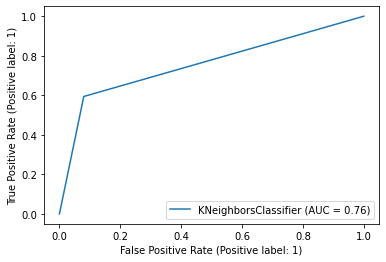

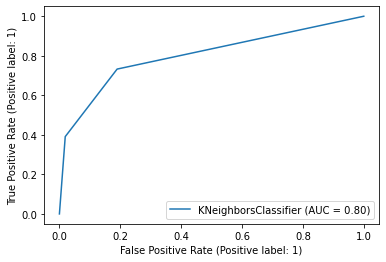

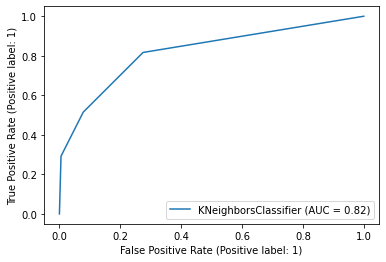

Accuracy: [0.8352638352638353, 0.8275418275418276, 0.8159588159588159]


In [136]:
#using our filtered data
fdtrain = processed.drop('Preterm', axis = 1)

# Define the inputs/features for the models you'll test below
x = fdtrain

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = processed['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
    metrics.plot_roc_curve(knn, x_test, y_test)
    plt.show()
    
print('Accuracy:',scores_list)

## Modelling by Trimester

In [138]:
#trying to see if grouping by trimester makes the model more/less accurate 
trimester = processed.groupby('TrimColl')

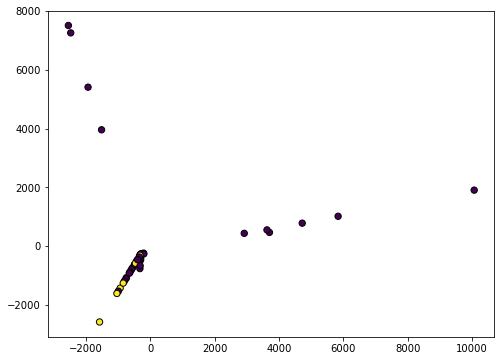

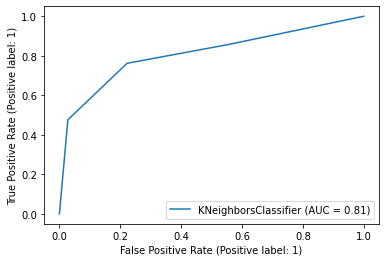

Accuracy: [0.7719298245614035]


In [189]:
#trimester 1
trim1 = trimester.get_group(1)
trim1train = trim1.drop('Preterm', axis = 1)

# Define the inputs/features for the models you'll test below
x = trim1

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = trim1['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test_trim1, y_train, y_test_trim1 = train_test_split(x, y, test_size=0.20)


scores_list = []

knn_trim1 = KNeighborsClassifier(n_neighbors=3)
knn_trim1.fit(x_train,y_train.values.ravel())
y_pred_knn_trim1 = knn.predict(x_test_trim1)
scores_list.append(metrics.accuracy_score(y_test_trim1,y_pred_knn_trim1))
    
    
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(x_test_trim1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn_trim1)
    
metrics.plot_roc_curve(knn_trim1, x_test_trim1, y_test_trim1)
plt.show()

print('Accuracy:',scores_list)

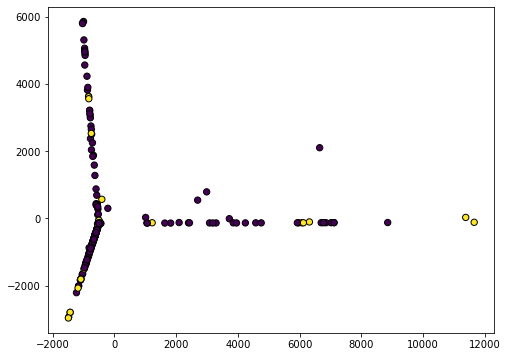

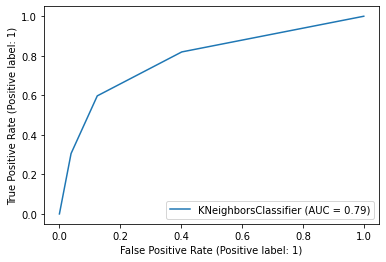

Accuracy: [0.7615658362989324]


In [190]:
#trimester 2
trim2 = trimester.get_group(2)
trim2train = trim2.drop('Preterm', axis = 1)

# Define the inputs/features for the models you'll test below
x = trim2

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = trim2['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test_trim2, y_train, y_test_trim2 = train_test_split(x, y, test_size=0.20)


scores_list = []

knn_trim2 = KNeighborsClassifier(n_neighbors=3)
knn_trim2.fit(x_train,y_train.values.ravel())
y_pred_knn_trim2 = knn.predict(x_test_trim2)
scores_list.append(metrics.accuracy_score(y_test_trim2,y_pred_knn_trim2))
    
    
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(x_test_trim2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn_trim2)
    
metrics.plot_roc_curve(knn_trim2, x_test_trim2, y_test_trim2)
plt.show()

print('Accuracy:',scores_list)

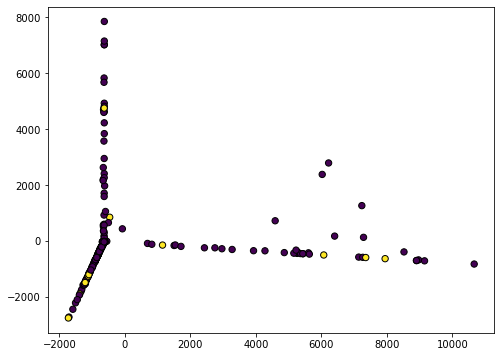

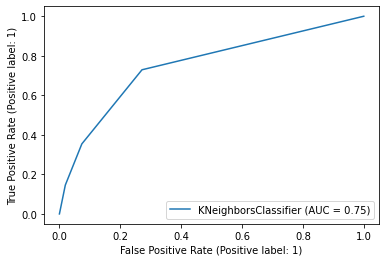

Accuracy: [0.8986928104575164]


In [191]:
#trimester 3
trim3 = trimester.get_group(3)
trim3train = trim3.drop('Preterm', axis = 1)

# Define the inputs/features for the models you'll test below
x = trim3

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = trim3['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test_trim3, y_train, y_test_trim3 = train_test_split(x, y, test_size=0.20)


scores_list = []

knn_trim3 = KNeighborsClassifier(n_neighbors=3)
knn_trim3.fit(x_train,y_train.values.ravel())
y_pred_knn_trim3 = knn.predict(x_test_trim3)
scores_list.append(metrics.accuracy_score(y_test_trim3,y_pred_knn_trim3))
    
    
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(x_test_trim3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn_trim3)
    
metrics.plot_roc_curve(knn_trim3, x_test_trim3, y_test_trim3)
plt.show()

print('Accuracy:',scores_list)

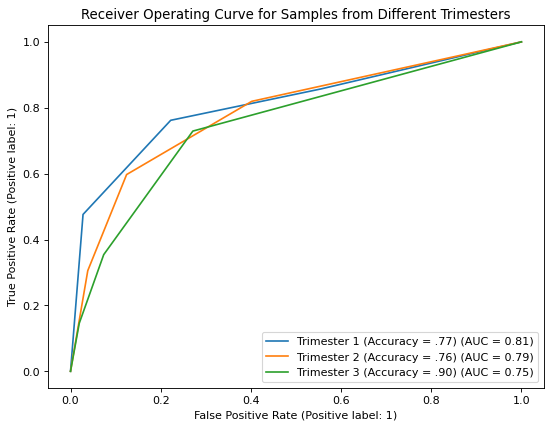

In [196]:
from sklearn.metrics import plot_roc_curve
from matplotlib.pyplot import figure


figure(figsize=(8, 6), dpi=80)

ax = plt.gca()
plot_roc_curve(knn_trim1, x_test_trim1, y_test_trim1, ax=ax, name = 'Trimester 1 (Accuracy = .77)')
plot_roc_curve(knn_trim2, x_test_trim2, y_test_trim2, ax=ax, name = 'Trimester 2 (Accuracy = .76)')
plot_roc_curve(knn_trim3, x_test_trim3, y_test_trim3, ax=ax, name = 'Trimester 3 (Accuracy = .90)')
plt.title("Receiver Operating Curve for Samples from Different Trimesters")

plt.savefig(basedir + '/Figures/TrimesterROC.png',bbox_inches = 'tight')




## Modelling by Sample Site 

In [83]:
# bodysite dfs: vaginal_swab, skin, cord_blood, saliva, stool, tooth_gum, urine

Accuracy: [0.8159203980099502, 0.8656716417910447, 0.8606965174129353]


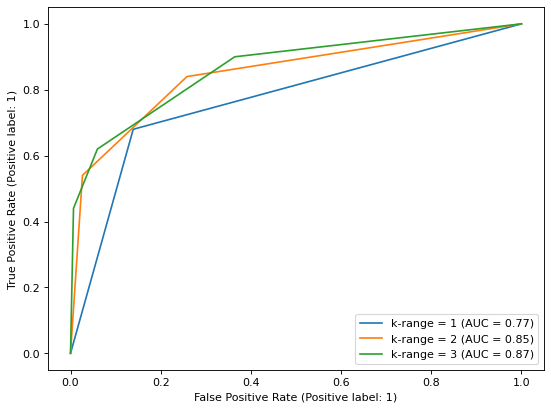

In [203]:
figure(figsize=(8, 6), dpi=80)
ax = plt.gca()
#vaginal 
vagtrain = vaginal_swab.drop('Preterm', axis = 1)
vagtrain = vaginal_swab.drop('BodySite', axis = 1)

# Define the inputs/features for the models you'll test below
x = vagtrain

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = vaginal_swab['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
    plot_roc_curve(knn, x_test, y_test, ax = ax, name = 'k-range = '+str(k))

print('Accuracy:',scores_list)

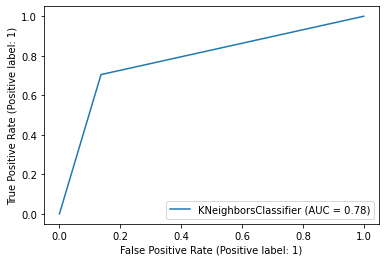

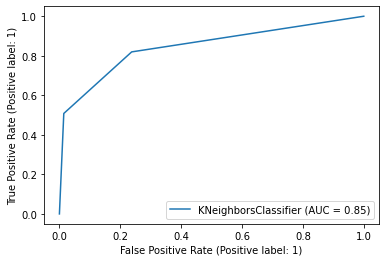

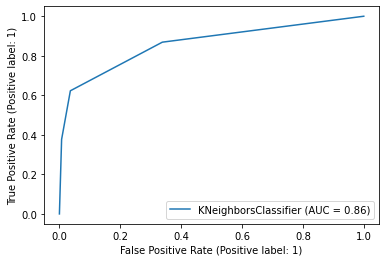

Accuracy: [0.815, 0.84, 0.86]


In [129]:
#saliva 
salivatrain = saliva.drop(['Preterm', 'BodySite'], axis = 1)

# Define the inputs/features for the models you'll test below
x = salivatrain

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = saliva['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
    metrics.plot_roc_curve(knn, x_test, y_test)
    plt.show()

print('Accuracy:',scores_list)

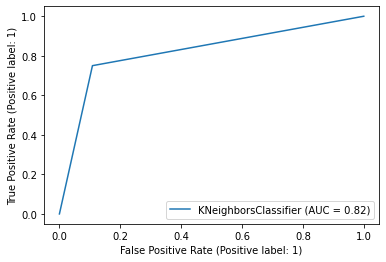

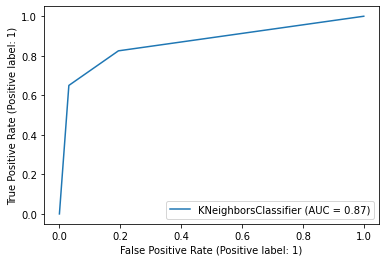

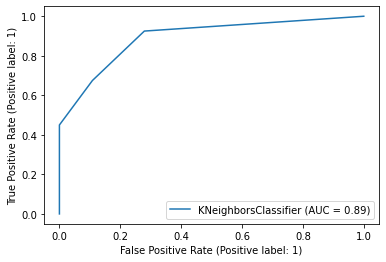

Accuracy: [0.8579881656804734, 0.893491124260355, 0.8402366863905325]


In [130]:
#stool 
stooltrain = stool.drop(['Preterm', 'BodySite'], axis = 1)

# Define the inputs/features for the models you'll test below
x = stooltrain

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = stool['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
    metrics.plot_roc_curve(knn, x_test, y_test)
    plt.show()

print('Accuracy:',scores_list)

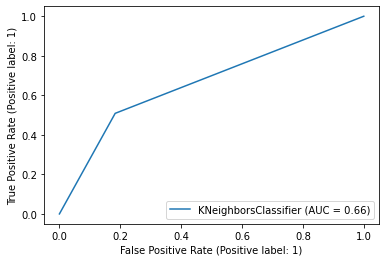

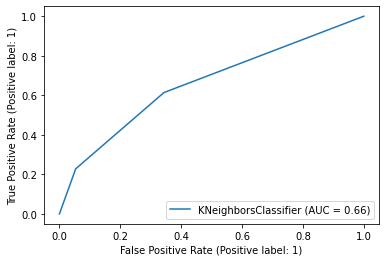

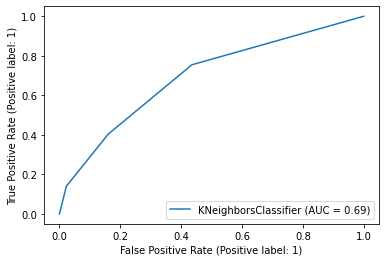

Accuracy: [0.723404255319149, 0.7287234042553191, 0.7074468085106383]


In [131]:
#tooth_gum 
toothgumtrain = tooth_gum.drop(['Preterm', 'BodySite'], axis = 1)

# Define the inputs/features for the models you'll test below
x = toothgumtrain

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = tooth_gum['Preterm']

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    #fig = plt.figure(1, figsize=(8, 6))
    #X_reduced = PCA(n_components=2).fit_transform(x_test)
    #plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=40, c = y_pred_knn)
    
    metrics.plot_roc_curve(knn, x_test, y_test)
    plt.show()

print('Accuracy:',scores_list)

Accuracy: [0.7761194029850746, 0.8159203980099502, 0.7910447761194029, 0.8, 0.815, 0.77, 0.893491124260355, 0.8816568047337278, 0.893491124260355]


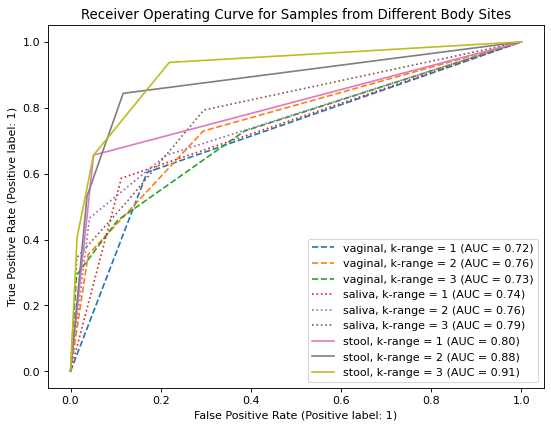

In [216]:
figure(figsize=(8, 6), dpi=80)
ax = plt.gca()

vagtrain = vaginal_swab.drop(['Preterm', 'BodySite'], axis = 1)
salivatrain = saliva.drop(['Preterm', 'BodySite'], axis = 1)
stooltrain = stool.drop(['Preterm', 'BodySite'], axis = 1)

# Define the inputs/features for the models you'll test below
x_vag = vagtrain
x_sal = salivatrain
x_sto = stooltrain


# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y_vag = vaginal_swab['Preterm']
y_sal = saliva['Preterm']
y_sto = stool['Preterm']


# We'll save 20 percent of our data for testing and use 80 percent for training
x_train_vag, x_test_vag, y_train_vag, y_test_vag = train_test_split(x_vag, y_vag, test_size=0.20)
x_train_sal, x_test_sal, y_train_sal, y_test_sal = train_test_split(x_sal, y_sal, test_size=0.20)
x_train_sto, x_test_sto, y_train_sto, y_test_sto = train_test_split(x_sto, y_sto, test_size=0.20)



k_range = range(1,4)
scores_list = []
for k in k_range:
    knn_vag = KNeighborsClassifier(n_neighbors=k)
    knn_vag.fit(x_train_vag,y_train_vag.values.ravel())
    y_pred_knn_vag = knn_vag.predict(x_test_vag)
    scores_list.append(metrics.accuracy_score(y_test_vag,y_pred_knn_vag))
    plot_roc_curve(knn_vag, x_test_vag, y_test_vag, ax = ax, name = 'vaginal, k-range = '+str(k), linestyle='--')
    
for k in k_range:
    knn_sal = KNeighborsClassifier(n_neighbors=k)
    knn_sal.fit(x_train_sal,y_train_sal.values.ravel())
    y_pred_knn_sal = knn_sal.predict(x_test_sal)
    scores_list.append(metrics.accuracy_score(y_test_sal,y_pred_knn_sal))
    plot_roc_curve(knn_sal, x_test_sal, y_test_sal, ax = ax, name = 'saliva, k-range = '+str(k), linestyle=':')
    
for k in k_range:
    knn_sto = KNeighborsClassifier(n_neighbors=k)
    knn_sto.fit(x_train_sto,y_train_sto.values.ravel())
    y_pred_knn_sto = knn_sto.predict(x_test_sto)
    scores_list.append(metrics.accuracy_score(y_test_sto,y_pred_knn_sto))
    plot_roc_curve(knn_sto, x_test_sto, y_test_sto, ax = ax, name = 'stool, k-range = '+str(k))

plt.title("Receiver Operating Curve for Samples from Different Body Sites")

print('Accuracy:',scores_list)